# Hunt Solution (2D plume in regional flow)

In [1]:
from scipy import *
from scipy import special
from scipy.special import kn as BesselK
#from scipy.special import expn as ExpInt
from math import sqrt as sqrt
from math import cosh as cosh
from math import log as ln # in python: log(x)=Ln(x)

def ExpInt(n,u):

    # n wordt niet gebruikt

    # Fast approximation for Wu according to equation 7a and 7b from Srivastava(1998)
    gamma = 0.5772 # Euler-Macheroni constant

    # Wu for u<1
    u0  = where(u<1.0,u,1) # u=1 is just a dummy to make ln() work on all values
    Wu0 = log(exp(-gamma)/u0) + 0.9653*u - 0.1690*u0**2

    #Wu for u>=1
    u1 = where(u>=1.0,u,1) # u=1 is just a dummy to make ln() work on all values
    Wu1 = 1/(u1*exp(u1))*(u1+0.3575)/(u1+1.280)

    # combine Wu0 and Wu1
    Wu = where(u<1.0,Wu0,Wu1)
    return Wu

def func_F(rho,tau):
# func_F is a fast approximation of Hantush well function W

    # Calculate parameter w
    w = (ExpInt(1,rho)-BesselK(0,rho))/(ExpInt(1,rho)-ExpInt(1,rho/2))

    # Calculate F(rho,tau)
    if tau <= 0:
        F = w*ExpInt(1,rho/2*e**(-tau))-(w-1)*ExpInt(1,rho*cosh(tau))
    else:
        F = 2*BesselK(0,rho) - w*ExpInt(1,rho/2*e**tau) + (w-1)*ExpInt(1,rho*cosh(tau))

    # return calculated value of F(rho,tau)
    return F

In [2]:
#######################
# Theis Well Function # 
#######################
def wellfn(u):
    import math
    if ((u >= 0) and (u <=1)):
# polynomial approximation constants
        a0 = -0.57721566
        a1 =  0.99999193
        a2 = -0.24991055
        a3 =  0.05519968
        a4 = -0.00976004
        a5 =  0.00107857
        wellfn = -math.log(u) + a0 + a1*u + a2*u**2 + a3*u**3 + a4*u**4 + a5*u**5
        return(wellfn)
    elif ((u >1)):
# polynomial approximation constants
        a1 =  8.5733287401
        a2 = 18.0590169730
        a3 =  8.6347608925
        a4 =  0.2677737343
        b1 =  9.5733223454
        b2 = 25.6329561486
        b3 = 21.0996530827
        b4 =  3.9584969228
        frac1 = u**4 + a1*u**3 + a2*u**2 + a3*u + a4
        frac2 = u**4 + b1*u**3 + b2*u**2 + b3*u + b4
        frac3 = u*math.exp(u)
        wellfn = (frac1/frac2)/frac3
        return(wellfn)
    else:
        print('error in wellfn')
        wellfn = -999.0
        return(wellfn)

In [3]:
wellfn(0.0001)

8.633224708670133

In [4]:
#######################
# Leaky Well Function #
#######################
def leakyfn(u,v):
    import math
    import numpy
    from scipy.special import kn as besselK
    from scipy.special import iv as besselI
# finite series recursion constants
    c12 =  0.0277777777777778
#
    c14 = -0.00347222222222222
    c15 =  0.00173611111111111
#
    c17 =  0.000416666666666667
    c18 = -0.000138888888888889
    c19 =  0.0000694444444444444
#
    c21 = -0.0000462962962962963
    c22 =  0.0000115740740740741
    c23 = -3.85802469135802E-06
    c24 =  1.92901234567901E-06
#
    c26 =  4.72411186696901E-06
    c27 = -9.44822373393802E-07
    c28 =  2.3620559334845E-07
    c29 = -7.87351977828168E-08
    c30 =  3.93675988914084E-08
#
    c32 = -4.42885487528345E-07
    c33 =  7.38142479213908E-08
    c34 = -1.47628495842782E-08
    c35 =  3.69071239606954E-09
    c36 = -1.23023746535651E-09
    c37 =  6.15118732678257E-10
#
# entry point 
    a3 = (v**2)/4  
# if leakance term is negligible, then return well function
    if (a3 == 0) :
        leakyfn = wellfn(u)
        return(leakyfn)
# if leakance/time term is large enough, then return besselKo
    if (a3/u > 5) :
        leakyfn = 2*besselK(0,v)
        return(leakyfn)
#  }
# finite series approximation for u>1, v<=2
    if ((u >= 1) and (v <= 2)) :
    # recursion terms built by-hand (ported from SSANTS)
        g11 = c12*a3
        g12 = c14*(a3**2)/(u)
        g21 = c15*(a3**2)
        g22 = c17*(a3**3)/(u**2)
        g23 = c18*(a3**3)/(u)
        g31 = c19*(a3**3)
        g32 = c21*(a3**4)/(u**3)
        g33 = c22*(a3**4)/(u**2)
        g34 = c23*(a3**4)/(u)
        g41 = c24*(a3**4)
        g42 = c26*(a3**5)/(u**4)
        g43 = c27*(a3**5)/(u**3)
        g44 = c28*(a3**5)/(u**2)
        g45 = c29*(a3**5)/(u)
        g51 = c30*(a3**5)
        g52 = c32*(a3**6)/(u**5)
        g53 = c33*(a3**6)/(u**4)
        g54 = c34*(a3**6)/(u**3)
        g55 = c35*(a3**6)/(u**2)
        g56 = c36*(a3**6)/(u)
        g61 = c37*(a3**6)
    # sum them up!
        a34list = [g11,g12,g21,g22,g23,g31,g32,g33,g34,g41,g42,g43,g44,g45,g51,g52,g53,g54,g55,g56,g61]
        a34 = numpy.sum(a34list)
        a35 = a34*math.exp(-u)
        a36 = a3/u
        a37 = besselI(v,0)
        a38 = wellfn(u)*a37
        a39 = 0.5772 + math.log(a36) + wellfn(a36) - a36 +(besselI(0,v)-1)/u
        a40 = a39*math.exp(-u)
        leakyfn = a38 - a40 + a35
        leakyfn=abs(leakyfn)
        return(leakyfn)
# finite series approximation for u<=1, v<=2
    if ((u <= 1) and (v <= 2)) :
    # recursion terms built by-hand (ported from SSANTS)
        g11 = c12*a3
        g12 = c14*(a3)/(u**-1)
        g21 = c15*(a3**2)
        g22 = c17*(a3)/(u**-2)
        g23 = c18*(a3**2)/(u**-1)
        g31 = c19*(a3**3)
        g32 = c21*(a3)/(u**-3)
        g33 = c22*(a3**2)/(u**-2)
        g34 = c23*(a3)/(u**-1)
        g41 = c24*(a3**4)
        g42 = c26*(a3)/(u**-4)
        g43 = c27*(a3**2)/(u**-3)
        g44 = c28*(a3**3)/(u**-2)
        g45 = c29*(a3**4)/(u**-1)
        g51 = c30*(a3**5)
        g52 = c32*(a3)/(u**-5)
        g53 = c33*(a3**2)/(u**-4)
        g54 = c34*(a3**3)/(u**-3)
        g55 = c35*(a3**4)/(u**-2)
        g56 = c36*(a3**5)/(u**-1)
        g61 = c37*(a3**6)
    # sum them up!  
        a70list = [g11,g12,g21,g22,g23,g31,g32,g33,g34,g41,g42,g43,g44,g45,g51,g52,g53,g54,g55,g56,g61]
        a70 = numpy.sum(a70list)
        a71 = u*a70
        a72 = a3/u
        a73 = 0.5772+math.log(u)+wellfn(u)-u+(besselI(0,v)-1)/(a72)
        a74 = a73*math.exp(-a72)
        a75 = besselI(0,v)*wellfn(a72)
        a76 = a75 - a74 + a71
        a77 = 2*besselK(0,v)
        leakyfn = (a77-a76)
        return(leakyfn)
# approximation for v > 2
    if (v > 2) :
        term1 = math.sqrt(pi/(2*v))
        term2 = math.exp(-v)
        term3 = -(v-2*u)/(2*math.sqrt(u))
        term4 = math.erfc(term3)
        leakyfn = term1*term2*term4
        return(leakyfn)
    else:
        print('error in leakyfn')
        leakyfn = -999.0
        return(leakyfn)

leakyfn(2.5 ,5.0)

0.0037766133746428825

In [5]:
def wh(u, rho): # Hantush Leaky aquifer well function
    import numpy
    """Returns Hantush's well function values

    Note: works only for scalar values of u and rho

    Parameters:
    -----------
    u : scalar  (u= r^2 * S / (4 * kD * t))
    rho : sclaar (rho =r / lambda, lambda = sqrt(kD * c))
    Returns:
    --------
    Wh(u, rho) : Hantush well function value for (u, rho)
    """
    try:
        u =float(u)
        rho =float(rho)
    except:
        print("u and rho must be scalars.")
        raise ValueError()

    LOGINF = 2
    y = numpy.logspace(numpy.log10(u), LOGINF, 1000)
    ym = 0.5 * (y[:-1]+  y[1:])
    dy = numpy.diff(y)
    wh = numpy.sum(numpy.exp(-ym - (rho / 2)**2 / ym ) * dy / ym)
    return(wh)

def chunt(c_injection,q_injection,l_thickness,d_x,d_y,velocity,x_location,y_location,time):
    import math
    rsq = (x_location**2 + (y_location**2)*(d_x/d_y))
    rrr = math.sqrt(rsq)
    aaa = rsq/(4.0*d_x*time)
    bbb = (rrr*velocity)/(2.0*d_x)
#    print(rsq,rrr,aaa,bbb)
    term1 = c_injection*q_injection/(4.0*math.pi*l_thickness)
    term2 = 1.0/(math.sqrt(d_x*d_y))
    term3 = math.exp((x_location*velocity)/(2.0*d_x))
    term4 = leakyfn(aaa,bbb)
    #if term4 <= 0.0: term4 = 0.0
#    print(term1,term2,term3,term4)
    chunt = term1*term2*term3*term4
    return chunt

In [6]:
# inputs
c_injection = 133
q_injection = 3.66
l_thickness = 1.75
d_x = 0.920
d_y = 0.092
velocity = 0.187
x_location = 123
y_location = 16
time = 400
output = chunt(c_injection,q_injection,l_thickness,d_x,d_y,velocity,x_location,y_location,time)
print("Concentration at x = ",round(x_location,2)," y= ",round(y_location,2) ," t= ",round(time,2) ," = ",round(output,3))
#

Concentration at x =  123  y=  16  t=  400  =  0.3


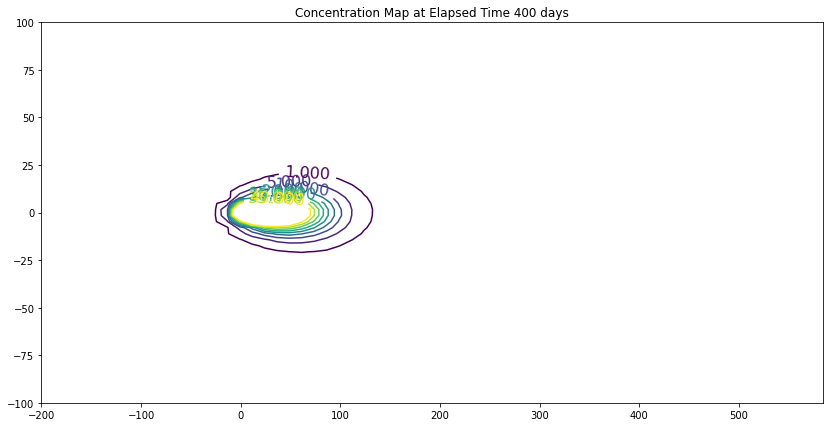

In [7]:
# make a plot
x_max = 200
y_max = 100
# build a grid
nrows = 50   
deltax = (x_max*4)/nrows
x = []
x.append(-x_max)
for i in range(nrows):
    if x[i] == 0.0:
        x[i] = 0.00001
    x.append(x[i]+deltax)

ncols = 50   
deltay = (y_max*2)/(ncols-1)
y = []
y.append(-y_max)
for i in range(1,ncols):
    if y[i-1] == 0.0:
        y[i-1] = 0.00001
    y.append(y[i-1]+deltay)
    
#y

#y = [i*deltay for i in range(how_many_points)] # constructor notation
#y[0]=0.001
ccc = [[0 for i in range(nrows)] for j in range(ncols)]

for jcol in range(ncols):
    for irow in range(nrows):
        ccc[irow][jcol] = chunt(c_injection,q_injection,l_thickness,d_x,d_y,velocity,x[irow],y[jcol],time)
        
#y

my_xyz = [] # empty list
count=0
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([ x[irow],y[jcol],ccc[irow][jcol] ])
       # print(count)
        count=count+1
        
#print(len(my_xyz))

import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
#print(min(coord_x), max(coord_x)) # activate to examine the dataframe
#print(min(coord_y), max(coord_y))
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 64)
lat = numpy.linspace(min(coord_y), max(coord_y), 64)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = [1,5,10,15,20,25,30,35,40])
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Concentration Map at Elapsed Time '+ str(round(time,1))+' days');



In [8]:
import math
rsq = (x_location**2 + (y_location**2)*(d_x/d_y))
rrr = math.sqrt(rsq)
u = rsq/(4.0*d_x*time)
v = (rrr*velocity)/(2.0*d_x)
term1 = math.sqrt(math.pi/(2*v))
term2 = math.exp(-v)
term3 = -(v-2*u)/(2*math.sqrt(u))
term4 = math.erfc(term3)
lfn = term1*term2*term4
print(lfn)

123/.187


1.4673528683095662e-08


657.7540106951872